# WeatherPy
----

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
url = f"{base_url}units=imperial&appid={weather_api_key}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
import json
import pprint
response = requests.get(url+city).json()
pprint.pprint(response)

{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': -30.18, 'lon': -50.21},
 'dt': 1592771115,
 'id': 3466165,
 'main': {'feels_like': 72.37,
          'grnd_level': 1012,
          'humidity': 66,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 73.9,
          'temp_max': 73.9,
          'temp_min': 73.9},
 'name': 'Cidreira',
 'sys': {'country': 'BR', 'sunrise': 1592734608, 'sunset': 1592771316},
 'timezone': -10800,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 274, 'speed': 9.78}}


In [8]:
name = []
cloudiness = []
country=[]
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print('''Beginning Data Retrieval
-----------------------------''')

# initial count method for both processing and set records
processing_record = 1
set_record = 1

for c, city in enumerate(cities):
    
    # if the count number divided by 50 with remainder equals zero, and the count number is greater than 50
    if (c % 50 == 0 and c>50):
        
        # set record increased by 1
        set_record += 1
        
        # processing_record start from zero
        processing_record = 0 
    
    try:
        weather = requests.get(url + city).json()
        
        #Insert data into lists
        name.append(weather["name"])
        cloudiness.append(weather["clouds"]["all"])
        country.append(weather["sys"]["country"])
        date.append(weather["dt"])
        humidity.append(weather["main"]["humidity"])
        lat.append(weather["coord"]["lat"])
        lng.append(weather["coord"]["lon"])
        max_temp.append(weather["main"]["temp_max"])
        wind_speed.append(weather["wind"]["speed"])
        print(f"Processing Record {processing_record} of set {set_record} | {city}")
        processing_record += 1
        
    except :
        print("City not found. Skipping...")
    pass

print('''-----------------------------
Data Retrieval Complete
-----------------------------''')
        
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | bembereke
Processing Record 2 of set 1 | clyde river
Processing Record 3 of set 1 | kruisfontein
Processing Record 4 of set 1 | richards bay
Processing Record 5 of set 1 | saint-pierre
Processing Record 6 of set 1 | barrow
Processing Record 7 of set 1 | birao
City not found. Skipping...
Processing Record 8 of set 1 | oranjestad
Processing Record 9 of set 1 | vila velha
Processing Record 10 of set 1 | hithadhoo
Processing Record 11 of set 1 | narsaq
Processing Record 12 of set 1 | butaritari
Processing Record 13 of set 1 | mishelevka
Processing Record 14 of set 1 | sao joao da barra
Processing Record 15 of set 1 | jamestown
Processing Record 16 of set 1 | fez
Processing Record 17 of set 1 | qaanaaq
Processing Record 18 of set 1 | coquimbo
Processing Record 19 of set 1 | atuona
Processing Record 20 of set 1 | vaini
Processing Record 21 of set 1 | yining
Processing Record 22 of set 1 | nador
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Export the city-data to a csv file 
#city_data.to_csv("city_data.csv")

In [17]:
city_data = pd.DataFrame({"City":name,
                         "Cloudiness":cloudiness,
                         "Country":country,
                         "Date":date,
                         "Humidity":humidity,
                         "Lat":lat,
                         "Lng":lng,
                         "Max Temp":max_temp,
                         "Wind Speed":wind_speed})
city_data.count()

City          583
Cloudiness    583
Country       583
Date          583
Humidity      583
Lat           583
Lng           583
Max Temp      583
Wind Speed    583
dtype: int64

In [18]:
#Display the DataFrame
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bembèrèkè,78,BJ,1592771396,78,10.23,2.66,77.97,9.10
1,Clyde River,1,CA,1592771127,81,70.47,-68.59,44.60,5.82
2,Kruisfontein,0,ZA,1592771129,88,-34.00,24.73,53.78,5.77
3,Richards Bay,0,ZA,1592771396,64,-28.78,32.04,62.29,6.46
4,Saint-Pierre,20,RE,1592771396,82,-21.34,55.48,66.20,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

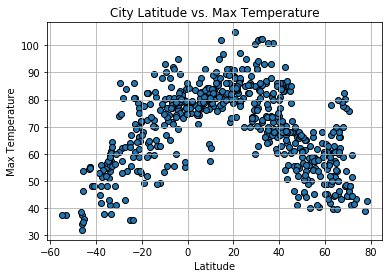

In [29]:
# Plot scatter points to visualize relationship between latitude and temperatue 
plt.scatter(lat, max_temp, marker ="o",edgecolor="black" )
plt.grid(True)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")

plt.show()

#### Latitude vs. Humidity Plot

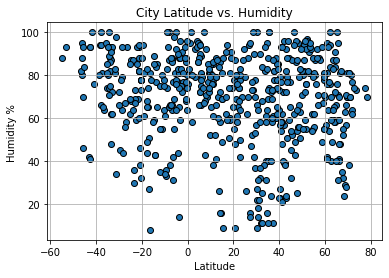

In [30]:
# Plot scatter points to visualize relationship between latitude and humidity 
plt.scatter(lat, humidity, marker ="o",edgecolor="black" )
plt.grid(True)

plt.xlabel("Latitude")
plt.ylabel("Humidity % ")
plt.title("City Latitude vs. Humidity")

plt.show()

#### Latitude vs. Cloudiness Plot

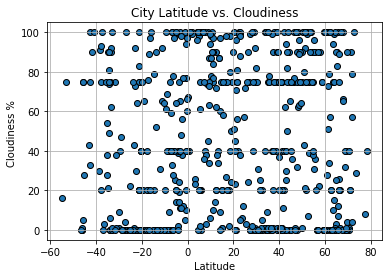

In [31]:
# Plot scatter points to visualize relationship between latitude and cloudiness 
plt.scatter(lat, cloudiness, marker ="o",edgecolor="black" )
plt.grid(True)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness % ")
plt.title("City Latitude vs. Cloudiness")

plt.show()

#### Latitude vs. Wind Speed Plot

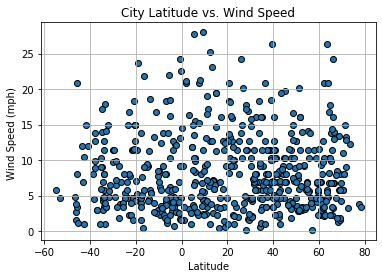

In [32]:
# Plot scatter points to visualize relationship between latitude and wind speed 
plt.scatter(lat, wind_speed, marker ="o",edgecolor="black" )
plt.grid(True)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph) ")
plt.title("City Latitude vs. Wind Speed")

plt.show()

## Linear Regression

In [43]:
# Create a function to create Linear Regression plots

def linear_regression(x_value, y_value):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    #print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)


    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = city_data.loc[(city_data["Lat"] >= 0)]
south_hemi_df = city_data.loc[(city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [51]:
x_value = north_hemi_df["Lat"]
y_value = north_hemi_df["Max Temp"]

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

NameError: name 'stats' is not defined

The r-squared is: -0.8151657406810827


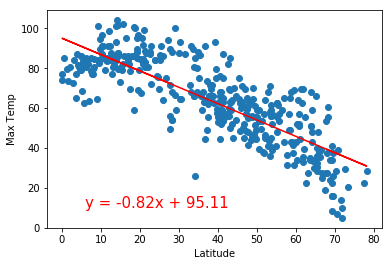

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


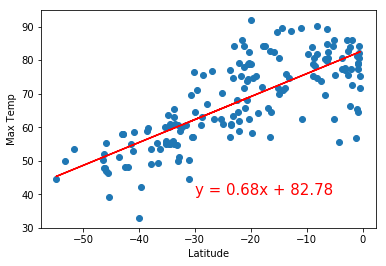

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


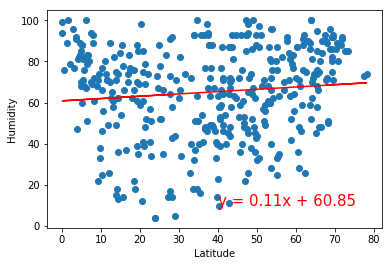

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


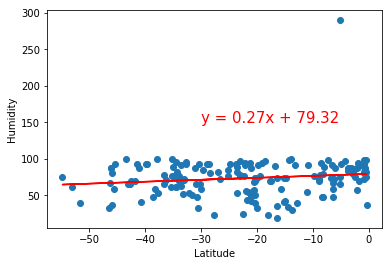

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


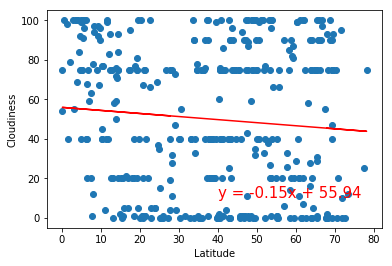

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


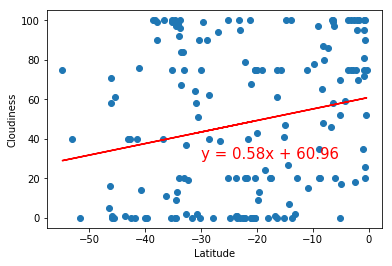

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


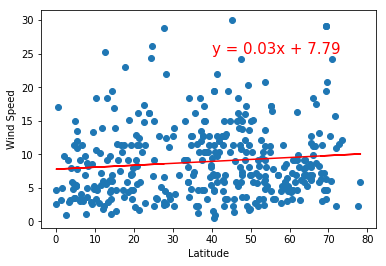

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


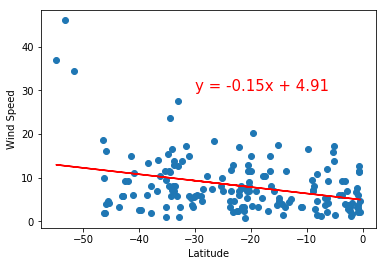